## Getting readability and language-agnostic features for Wiki-Viki data

In this notebook, we get the multilingual Wikipedia-Vikidia data, get the redability scores (customized and non-customized), annotate entities in them with db-spotlight, get the language agnostic features and save them in a pickled dictionary.

In [1]:
# general parameters
custom_flag = True # custom refers to whether the readability formula was customized for the specific language
bz_unzip_flag = True

# TODO: the non-customization needs to be done better without changing the source files of the package.

if custom_flag:
    custom = '_custom'
else:
    custom = ''
    
if bz_unzip_flag:
    bz_unzip = '_bz_unzipped'
else:
    bz_unzip = ''

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
figsize = (8, 6.5)

In [4]:
import json
import bz2,shutil
import pandas as pd
import ast
import numpy as np

In [5]:
import pickle

In [6]:
datapath = '../data/'

In [7]:
from utils import apply_dbpedia

In [8]:
## try for wiki-viki data, i.e., other languages
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(datapath) if isfile(join(datapath, f))]

In [9]:
data = {}

for filename in onlyfiles:
    lang = filename.split('-')[1].split('_')[0]
    if filename[-3:] == 'bz2':
        print(lang, filename)
        if bz_unzip_flag:
            lines = []
            with bz2.open(datapath + filename, "rt") as fin:
                for line in fin:
                    lines.append(json.loads(line))
                data[lang] = lines    
        else:
            with open(datapath + filename[:-4], 'r') as file:
                lines = file.readlines()
            data[lang] = []
            for line in lines:
                data[lang].append(ast.literal_eval(line))
        print(len(data[lang]))

scn vikiwiki-scn_text.bz2
8
el vikiwiki-el_text.bz2
33
ru vikiwiki-ru_text.bz2
94
es vikiwiki-es_text.bz2
2141
fr vikiwiki-fr_text.bz2
10016
pt vikiwiki-pt_text.bz2
40
en vikiwiki-en_text.bz2
1729
de vikiwiki-de_text.bz2
242
it vikiwiki-it_text.bz2
1173
hy vikiwiki-hy_text.bz2
6
ca vikiwiki-ca_text.bz2
211
eu vikiwiki-eu_text.bz2
945


In [10]:
# only keep those languages which have at least 90 articles
exclude_langs = []

for lang in data:
    if len(data[lang]) < 90:
        exclude_langs.append(lang)

for lang in exclude_langs:
    del data[lang]
        
available_langs = list(data.keys())

In [11]:
# # update the german wiki
# with open(datapath + 'vikiwiki-de_text_retokenized', 'r') as file:
#     lines = file.readlines()
#     if len(lines) > 100:
#         data['de_retokenized'] = []
#         for line in lines:
#             data['de_retokenized'].append(ast.literal_eval(line))
#         print(len(data['de_retokenized']))
        
# available_langs = available_langs + ['de_retokenized']

In [12]:
# for which languages is the linker available?
import spacy_dbpedia_spotlight
import spacy

langs = data.keys()
for lang in langs:
    lang_ = lang.split('_')[0]
    try:
        nlp = spacy_dbpedia_spotlight.create(lang_)
    except Exception as e:
        print(lang_)
        print(e)
        available_langs.remove(lang_)
        pass

ca
Linker not available in ca. Choose one of ['en', 'de', 'es', 'fr', 'it', 'nl', 'pt', 'ru']
eu
Linker not available in eu. Choose one of ['en', 'de', 'es', 'fr', 'it', 'nl', 'pt', 'ru']


In [13]:
available_langs

['ru', 'es', 'fr', 'en', 'de', 'it']

In [14]:
data.keys()

dict_keys(['ru', 'es', 'fr', 'en', 'de', 'it', 'ca', 'eu'])

In [15]:
# # ADD KLEXIKON
# with open('intermediate/klexikon_lede.pickle', 'rb') as handle:
#     data['de_klexikon'] = pickle.load(handle) 
    
# available_langs = available_langs + ['de_klexikon']

In [16]:
editions = ['wiki', 'viki']

In [17]:
# # tag with entites; do once and load the pickle instead
# data_ = {}
# for lang in available_langs:
#     data_[lang] = []
#     for n, datapoint in enumerate(data[lang]):
#         data_[lang].append(datapoint)
#         if n % 100 == 0:
#             print(n, ' done...')
#         for wiki in editions:
#             lang_ = lang.split('_')[0]
#             data_[lang][-1][wiki]['entities'] = list(apply_dbpedia(datapoint[wiki], lang_))
            
# with open('intermediate/wiki_viki_entities_lede%s.pickle' %bz_unzip, 'wb') as handle:
#     pickle.dump(data_, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('intermediate/wiki_viki_entities_lede%s.pickle' %bz_unzip, 'rb') as handle:
    data_ = pickle.load(handle) 
    
## use this code snippet to load the existing dictionaries and add any new datasets for e.g, klexikon, etc    
# ## tag with entites for the new dataset; do once and load the pickle instead
# for lang in ['ru']:
#     data_[lang] = []
#     for n, datapoint in enumerate(data[lang]):
#         data_[lang].append(datapoint)
#         if n % 100 == 0:
#             print(n, ' done...')
#         for wiki in editions:
#             lang_ = lang.split('_')[0]
#             data_[lang][-1][wiki]['entities'] = list(apply_dbpedia(datapoint[wiki], lang_))
            
# with open('intermediate/wiki_viki_entities_lede%s.pickle' %bz_unzip, 'wb') as handle:
#     pickle.dump(data_, handle, protocol=pickle.HIGHEST_PROTOCOL)   

In [19]:
# apply flesch reading ease (as that works for all the available languages)
# do once and load

In [20]:
# import textstat
import textstat

In [21]:
## customize the textstat code to fix the coefficients
textstat.__file__

'/home/indira/anaconda3/envs/py36/lib/python3.6/site-packages/textstat/__init__.py'

In [22]:
# for lang in data_:
#     lang_ = lang.split('_')[0]
#     textstat.set_lang(lang_)
#     for datapoint in data_[lang]:
#         for wiki in editions:
#             datapoint[wiki]['flesch_reading_ease'] = textstat.flesch_reading_ease(' '.join(datapoint[wiki]['text']))

# with open('intermediate/wiki_viki_readability_formulae%s_lede%s.pickle' %(custom,bz_unzip), 'wb') as handle:
#     pickle.dump(data_, handle, protocol=pickle.HIGHEST_PROTOCOL)   

with open('intermediate/wiki_viki_readability_formulae%s_lede%s.pickle' %(custom,bz_unzip), 'rb') as handle:
    data_ = pickle.load(handle)   

In [23]:
del data_['de_retokenized'] # de and de_retokenized are the same now
data_.keys()

dict_keys(['es', 'fr', 'en', 'de', 'it', 'ru'])

In [24]:
# aggregate metrics
readability_metrics = ['flesch_reading_ease']

sums = {}
datas = {}

for lang in data_:
    sums[lang] = {}
    datas[lang] = {}
    for edition in editions:
        sums[lang][edition] = {}
        datas[lang][edition] = {}
    
    for wiki in editions:
        for metric in readability_metrics:
            sums[lang][wiki][metric] = 0
            datas[lang][wiki][metric] = []
        

    for datapoint in data_[lang]:
        for wiki in editions:
            for metric in readability_metrics:
                sums[lang][wiki][metric] += datapoint[wiki][metric]
                datas[lang][wiki][metric].append(datapoint[wiki][metric])

es
wiki: 62.080
0 0
viki: 74.984
0 0
fr
wiki: 64.093
0 1
viki: 76.365
0 1
en
wiki: 57.393
0 2
viki: 75.527
0 2
de
wiki: 42.245
1 0
viki: 57.672
1 0
it
wiki: 57.037
1 1
viki: 72.274
1 1
ru
wiki: 38.168
1 2


No handles with labels found to put in legend.


viki: 56.360
1 2


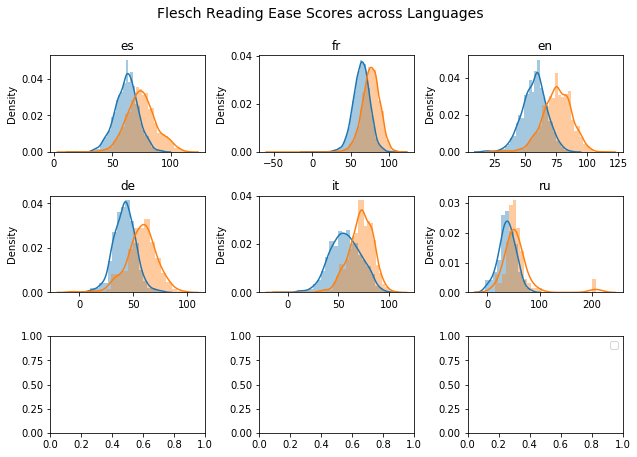

In [25]:
nrows = 3
ncols = 3
num = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize = (ncols*3, 6),
                        sharex = False, sharey = False)

for n, lang in enumerate(data_):
    print(lang)
    for metric in readability_metrics:
        for edition in editions:
            print('%s: %0.3f' %(edition, sums[lang][edition][metric]/len(datas[lang][edition][metric])))
            i = n//ncols
            j = n%ncols
            print(i, j)
            sns.distplot(datas[lang][edition][metric], label = edition, ax = axs[i][j])  
            axs[i][j].set_title(lang)
            

plt.legend()
title = 'Flesch Reading Ease Scores across Languages'
plt.suptitle(title, fontsize = 14, y = 1.05)
plt.tight_layout()
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

In [26]:
import random
for _ in range(0, 10):
    print(random.randint(0, 1))

0
1
1
1
0
0
1
1
1
0


In [27]:
## paired eval

# where higher score = better readability
higher_metrics = ['flesch_reading_ease']

# where lower score = better readability
lower_metrics = []

for lang in data_:
    for datapoint in data_[lang]:
        datapoint['simpler'] = {}
        for metric in lower_metrics:
            ## random assignment when equal
            if datapoint['viki'][metric] == datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = random.randint(0, 1)
            elif datapoint['viki'][metric] < datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = 1
            else:
                datapoint['simpler'][metric] = 0
    
        for metric in higher_metrics:
            if datapoint['viki'][metric] == datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = random.randint(0, 1)
            elif datapoint['viki'][metric] > datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = 1
            else:
                datapoint['simpler'][metric] = 0
        
    

In [28]:
summary = {}

for lang in data_:
    summary[lang] = {}
    for metric in readability_metrics:
        summary[lang][metric] = len([i for i in data_[lang] if i['simpler'][metric] == 1])/len(data_[lang])

summary

{'es': {'flesch_reading_ease': 0.8435310602522186},
 'fr': {'flesch_reading_ease': 0.8450479233226837},
 'en': {'flesch_reading_ease': 0.9230769230769231},
 'de': {'flesch_reading_ease': 0.8429752066115702},
 'it': {'flesch_reading_ease': 0.8380221653878943},
 'ru': {'flesch_reading_ease': 0.776595744680851}}

In [29]:
# entity-based measures
from utils import get_entities_and_mentions

In [30]:
for lang in data_:
    for n, datapoint in enumerate(data_[lang]):
        for wiki in editions:
            datapoint[wiki]['list_of_entity_types_sent'], datapoint[wiki]['list_of_entity_types_doc'],\
            datapoint[wiki]['list_of_mention_types_sent'], datapoint[wiki]['list_of_mention_types_doc'],\
            datapoint[wiki]['list_of_tokens_sent'], datapoint[wiki]['list_of_tokens_doc']\
            = get_entities_and_mentions(datapoint[wiki])  

In [31]:
data_['en'][0]['wiki']['list_of_mention_types_doc']

['Army',
 'American',
 'Fort Stanwix',
 'New York',
 'England',
 'Atlantic Ocean',
 'British Army',
 'Groton',
 'General',
 'captured Fort Ticonderoga',
 'Continental Army',
 'Peggy Shippen',
 'Saratoga',
 'Boston',
 'Loyalist',
 'Richmond',
 'Philadelphia',
 'Peggy',
 'Valcour Island',
 'Continental Congress',
 'Tories',
 'brigadier general',
 'King George III',
 'Connecticut',
 'pension',
 'Washington',
 'Whigs',
 'Canada',
 'fort',
 'Congress',
 'New London, Connecticut',
 'British',
 'Ridgefield',
 'John André',
 'American Legion',
 'Arnold',
 'London',
 'Brandt',
 'Benedict Arnold',
 'espionage',
 'major general',
 'militia',
 'George Washington',
 'West Point',
 'Champlain',
 'intelligence']

In [32]:
data_['en'][0]['viki']['list_of_mention_types_doc']

['Washington',
 'treason',
 'Arnold',
 'American',
 'Benedict Arnold',
 'George Washington',
 'British',
 'American Revolutionary War',
 'West Point, New York']

In [33]:
data_['de'][0]['viki']['list_of_mention_types_doc']

['Mannschaftsspiele',
 'Fuß',
 'Olympischen Spiele',
 'Torwart',
 'Englisch',
 'Ball',
 'Fußball',
 'Schiedsrichter']

In [34]:
data_['de'][0]['wiki']['list_of_mention_types_doc']

['Diskussionspapier',
 'Fuß',
 'Straßenfußball',
 'Bundeswehr',
 'Wirtschaftswissenschaften',
 'Großbritannien',
 'Mannschaftssportart',
 'Kontinentaleuropa',
 'Ball',
 'Abseitsregel',
 'Fußball',
 'Elfmeterschießen',
 'Entwicklungsländern',
 'Hamburg',
 'Profifußball',
 'Torwart',
 'Videobeweis',
 'Dambeck',
 'Quantifizierung',
 'Ballsportart',
 'Handball',
 'Zentralbibliothek']

In [35]:
for lang in data_:
    for datapoint in data_[lang]:
        for wiki in editions:
            num_sents = len(datapoint[wiki]['text'])
            doc_len = len(datapoint[wiki]['list_of_tokens_doc'])
        
            datapoint[wiki]['avg_sent_length_tokens_lang_agn'] = sum([len(i) for i in datapoint[wiki]['list_of_tokens_sent'\
                                                                                                     ]]) / num_sents
            datapoint[wiki]['avg_sent_length_entity_types'] = sum([len(i) for i in datapoint[wiki]['list_of_entity_types_sent'\
                                                                                                  ]]) / num_sents
            datapoint[wiki]['avg_sent_length_mention_types'] = sum([len(i) for i in datapoint[wiki]['list_of_mention_types_sent'\
                                                                                                   ]]) / num_sents
            
            datapoint[wiki]['avg_sent_length_tokens_lang_agn'] = sum([len(i) for i in datapoint[wiki]['list_of_tokens_sent'\
                                                                                                     ]]) / num_sents
            datapoint[wiki]['avg_sent_length_entity_types'] = sum([len(i) for i in datapoint[wiki]['list_of_entity_types_sent'\
                                                                                                  ]]) / num_sents
            datapoint[wiki]['avg_sent_length_mention_types'] = sum([len(i) for i in datapoint[wiki]['list_of_mention_types_sent'\
                                                                                                   ]]) / num_sents
        
            if datapoint[wiki]['avg_sent_length_tokens_lang_agn'] != 0:
                datapoint[wiki]['sent_type_token_ratio_entity'] = datapoint[wiki]['avg_sent_length_entity_types'] / datapoint[wiki]['avg_sent_length_tokens_lang_agn']
                datapoint[wiki]['sent_type_token_ratio_mention'] = datapoint[wiki]['avg_sent_length_mention_types'] / datapoint[wiki]['avg_sent_length_tokens_lang_agn']
            else:
                datapoint[wiki]['sent_type_token_ratio_entity'] = 0
                datapoint[wiki]['sent_type_token_ratio_mention'] = 0
            
            # doc level features
            if doc_len != 0:
                datapoint[wiki]['doc_type_token_ratio_entity'] = len(datapoint[wiki]['list_of_entity_types_doc']) / doc_len
                datapoint[wiki]['doc_type_token_ratio_mention'] = len(datapoint[wiki]['list_of_mention_types_doc']) / doc_len
            else:
                datapoint[wiki]['doc_type_token_ratio_entity'] = 0
                datapoint[wiki]['doc_type_token_ratio_mention'] = 0
 


In [36]:
from scipy import stats 

metrics = ['avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types', 'avg_sent_length_mention_types', 
           'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
           'doc_type_token_ratio_mention', 'flesch_reading_ease']

sums = {}
datas = {}

for lang in data_:
    sums[lang] = {}
    datas[lang] = {}
    for edition in editions:
        sums[lang][edition] = {}
        datas[lang][edition] = {}
    
    for wiki in editions:
        for metric in metrics:
            sums[lang][wiki][metric] = 0
            datas[lang][wiki][metric] = []
        

    for datapoint in data_[lang]:
        for wiki in editions:
            for metric in metrics:
                sums[lang][wiki][metric] += datapoint[wiki][metric]
                datas[lang][wiki][metric].append(datapoint[wiki][metric])

In [37]:
len(metrics)

8

In [38]:
lang = 'es'

In [39]:
import math

def feature_dist(lang):
    nrows = 1 if len(metrics) < 5 else 2
    ncols = math.ceil(len(metrics)/nrows)
    num = 0

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize = (12, nrows*3),
                        sharex = False, sharey = False)

    for i in range(nrows):
        for j in range(ncols):
            metric = metrics[num]
            axx = axs[i][j] if nrows > 1 else axs[j]
            for wiki in editions:
                sns.distplot(datas[lang][wiki][metric], ax = axx, label = wiki)
            title = '%s\n%0.2f (p  = %0.3f)' %(metric, stats.ttest_rel(datas[lang]['wiki'][metric], datas[lang]['viki'][metric])[0],
                                          stats.ttest_rel(datas[lang]['wiki'][metric], datas[lang]['viki'][metric])[1])
            axx.set_title(title)
            if j == 0:
                axx.set_ylabel('density')
            else:
                axx.set_ylabel('')
            num = num+1
            if num == len(metrics):
                break
            

    title = 'Distribution of entity-based and readability metrics for %s' %lang
    plt.suptitle(title, fontsize = 14, y = 1.05)
    axx.legend(bbox_to_anchor=(1.1, 1.05))
    plt.tight_layout()
#     plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
#     plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

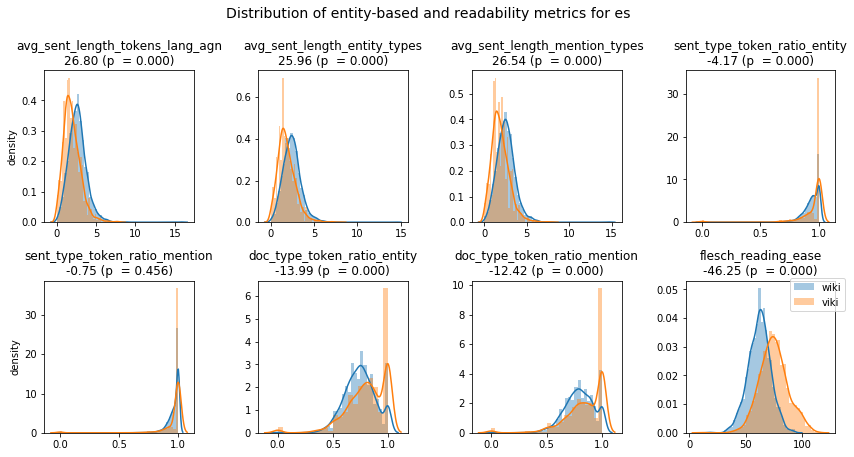

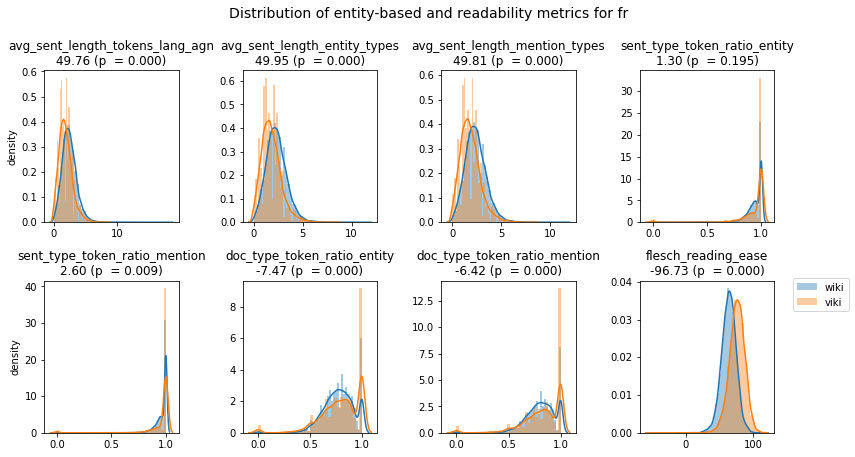

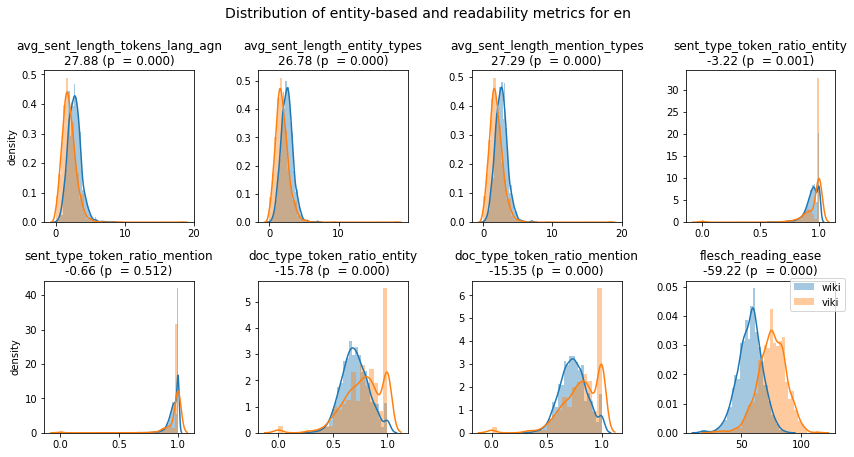

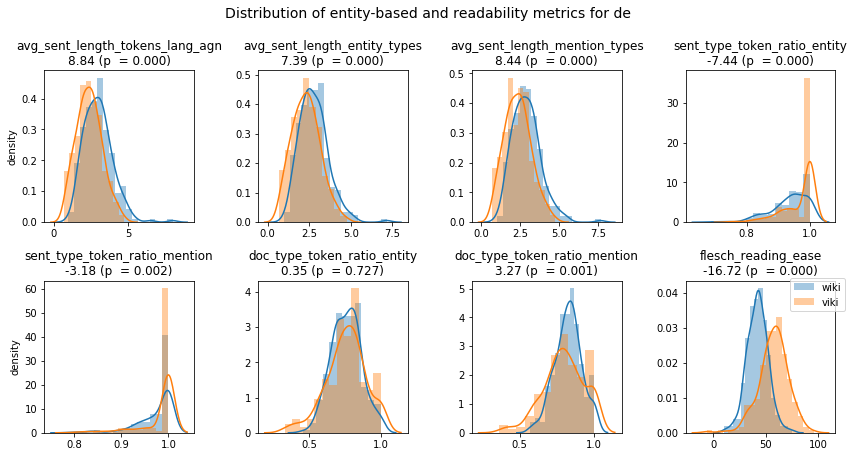

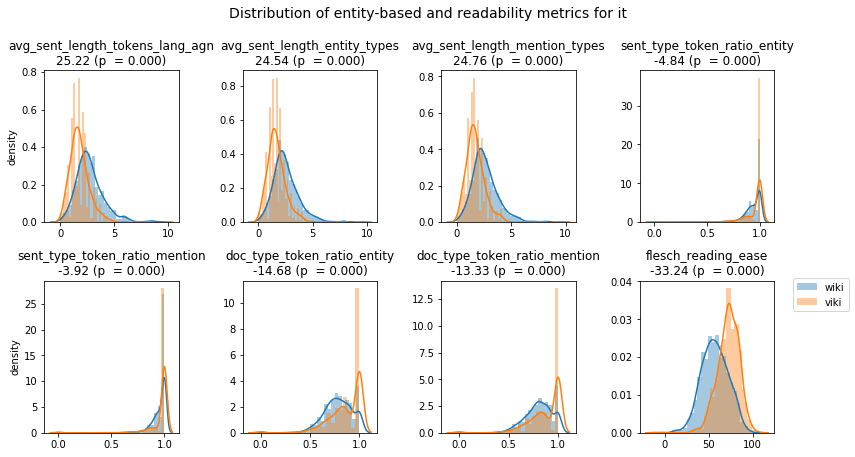

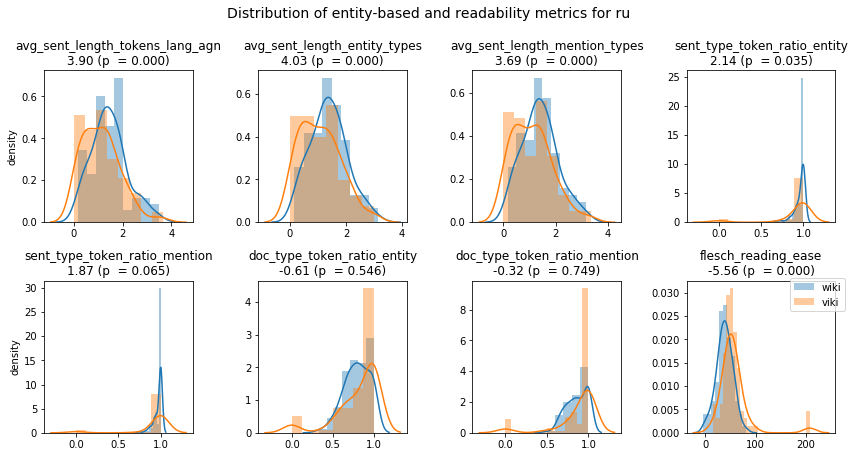

In [40]:
for lang in data_:
    feature_dist(lang)

In [41]:
wikis = []
vikis = []
langs = []
all_metrics = []

for lang in data_:
    for metric in metrics:
        wikis.append(sums[lang]['wiki'][metric]/len(datas[lang]['wiki'][metric]))
        vikis.append(sums[lang]['viki'][metric]/len(datas[lang]['viki'][metric]))
        langs.append(lang)
        all_metrics.append(metric)

result_summary = pd.DataFrame([all_metrics, langs, wikis, vikis]).transpose()
result_summary.columns = ['metric', 'lang', 'wiki', 'viki']
result_summary

metric lang      wiki      viki
0   avg_sent_length_tokens_lang_agn   es   2.63957   1.93845
1      avg_sent_length_entity_types   es   2.45763   1.84406
2     avg_sent_length_mention_types   es   2.54169    1.8871
3      sent_type_token_ratio_entity   es  0.936637  0.949318
4     sent_type_token_ratio_mention   es   0.96565  0.967715
5       doc_type_token_ratio_entity   es  0.746504  0.808683
6      doc_type_token_ratio_mention   es  0.793894  0.847107
7               flesch_reading_ease   es   62.0799   74.9838
8   avg_sent_length_tokens_lang_agn   fr   2.47269   1.88676
9      avg_sent_length_entity_types   fr   2.32697   1.79297
10    avg_sent_length_mention_types   fr   2.38349   1.83565
11     sent_type_token_ratio_entity   fr  0.945894  0.943906
12    sent_type_token_ratio_mention   fr  0.966778  0.963063
13      doc_type_token_ratio_entity   fr  0.778708  0.794992
14     doc_type_token_ratio_mention   fr  0.814408  0.828035
15              flesch_reading_ease   fr   64.0932   76.3654
16  avg_sent_length_tokens_lang_agn   en   2.70997   1.92554
17     avg_sent_length_entity_types   en   2.53515   1.83753
18    avg_sent_length_mention_types   en   2.60416   1.87386
19     sent_type_token_ratio_entity   en  0.940166   0.95013
20    sent_type_token_ratio_mention   en  0.964632  0.966512
21      doc_type_token_ratio_entity   en  0.704743  0.780062
22     doc_type_token_ratio_mention   en  0.744131  0.815187
23              flesch_reading_ease   en    57.393   75.5268
24  avg_sent_length_tokens_lang_agn   de   2.98813   2.39061
25     avg_sent_length_entity_types   de   2.77941   2.31697
26    avg_sent_length_mention_types   de   2.90201   2.35101
27     sent_type_token_ratio_entity   de  0.935306  0.968139
28    sent_type_token_ratio_mention   de  0.973646  0.983036
29      doc_type_token_ratio_entity   de   0.76047  0.757127
30     doc_type_token_ratio_mention   de  0.825586  0.795996
31              flesch_reading_ease   de   42.2446   57.6723
32  avg_sent_length_tokens_lang_agn   it   2.73595   1.78009
33     avg_sent_length_entity_types   it   2.54213    1.6955
34    avg_sent_length_mention_types   it   2.59349    1.7227
35     sent_type_token_ratio_entity   it  0.935494  0.954148
36    sent_type_token_ratio_mention   it  0.952438  0.966738
37      doc_type_token_ratio_entity   it  0.784815  0.866501
38     doc_type_token_ratio_mention   it  0.804864  0.877626
39              flesch_reading_ease   it   57.0368   72.2736
40  avg_sent_length_tokens_lang_agn   ru   1.45681   1.11572
41     avg_sent_length_entity_types   ru   1.38023   1.07257
42    avg_sent_length_mention_types   ru   1.40302   1.09698
43     sent_type_token_ratio_entity   ru  0.961812  0.908945
44    sent_type_token_ratio_mention   ru  0.971437  0.923702
45      doc_type_token_ratio_entity   ru  0.795252  0.811073
46     doc_type_token_ratio_mention   ru  0.861963  0.870274
47              flesch_reading_ease   ru   38.1683   56.3603

In [42]:
print(result_summary.round(2).to_markdown())

|    | metric                          | lang   |      wiki |      viki |
|---:|:--------------------------------|:-------|----------:|----------:|
|  0 | avg_sent_length_tokens_lang_agn | es     |  2.63957  |  1.93845  |
|  1 | avg_sent_length_entity_types    | es     |  2.45763  |  1.84406  |
|  2 | avg_sent_length_mention_types   | es     |  2.54169  |  1.8871   |
|  3 | sent_type_token_ratio_entity    | es     |  0.936637 |  0.949318 |
|  4 | sent_type_token_ratio_mention   | es     |  0.96565  |  0.967715 |
|  5 | doc_type_token_ratio_entity     | es     |  0.746504 |  0.808683 |
|  6 | doc_type_token_ratio_mention    | es     |  0.793894 |  0.847107 |
|  7 | flesch_reading_ease             | es     | 62.0799   | 74.9838   |
|  8 | avg_sent_length_tokens_lang_agn | fr     |  2.47269  |  1.88676  |
|  9 | avg_sent_length_entity_types    | fr     |  2.32697  |  1.79297  |
| 10 | avg_sent_length_mention_types   | fr     |  2.38349  |  1.83565  |
| 11 | sent_type_token_ratio_entity   

In [43]:
# result_summary.round(3).to_csv('../tables/entity_feature_average_multilingual.csv', sep ='\t', index = False)

### Paired evaluation

for each datapoint, and for each metric, get a label = 1 if the simple edition has a better score, or 0 if not

In [44]:
# where higher score = better readability
higher_metrics = ['flesch_reading_ease',
#                  'sent_type_token_ratio_entity',
#                  'sent_type_token_ratio_mention',
#                  'doc_type_token_ratio_entity',
#                  'doc_type_token_ratio_mention'
                 ]

# where lower score = better readability
lower_metrics = [
                 'avg_sent_length_tokens_lang_agn',
                 'avg_sent_length_entity_types',
                 'avg_sent_length_mention_types',
                 'sent_type_token_ratio_entity',
                 'sent_type_token_ratio_mention',
                 'doc_type_token_ratio_entity',
                 'doc_type_token_ratio_mention'
                ]

In [45]:
data_['en'][0]['viki'].keys()

dict_keys(['title', 'text', 'entities', 'flesch_reading_ease', 'list_of_entity_types_sent', 'list_of_entity_types_doc', 'list_of_mention_types_sent', 'list_of_mention_types_doc', 'list_of_tokens_sent', 'list_of_tokens_doc', 'avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types', 'avg_sent_length_mention_types', 'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity', 'doc_type_token_ratio_mention'])

In [46]:
# for lang in data_:
#     for datapoint in data_[lang]:
#         datapoint['simpler'] = {}
#         for metric in lower_metrics:
#             if datapoint['viki'][metric] < datapoint['wiki'][metric]:
#                 datapoint['simpler'][metric] = 1
#             else:
#                 datapoint['simpler'][metric] = 0
    
#         for metric in higher_metrics:
#             if datapoint['viki'][metric] > datapoint['wiki'][metric]:
#                 datapoint['simpler'][metric] = 1
#             else:
#                 datapoint['simpler'][metric] = 0

In [47]:
for lang in data_:
    for datapoint in data_[lang]:
        datapoint['simpler'] = {}
        for metric in lower_metrics:
            ## random assignment when equal
            if datapoint['viki'][metric] == datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = random.randint(0, 1)
            elif datapoint['viki'][metric] < datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = 1
            else:
                datapoint['simpler'][metric] = 0
    
        for metric in higher_metrics:
            if datapoint['viki'][metric] == datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = random.randint(0, 1)
            elif datapoint['viki'][metric] > datapoint['wiki'][metric]:
                datapoint['simpler'][metric] = 1
            else:
                datapoint['simpler'][metric] = 0

In [48]:
data_['en'][0]['simpler']

{'avg_sent_length_tokens_lang_agn': 1,
 'avg_sent_length_entity_types': 1,
 'avg_sent_length_mention_types': 1,
 'sent_type_token_ratio_entity': 0,
 'sent_type_token_ratio_mention': 0,
 'doc_type_token_ratio_entity': 1,
 'doc_type_token_ratio_mention': 0,
 'flesch_reading_ease': 0}

In [49]:
metrics = higher_metrics + lower_metrics

In [50]:
summary = {}

for lang in data_:
    summary[lang] = {}
    for metric in metrics:
        summary[lang][metric] = len([i for i in data_[lang] if i['simpler'][metric] == 1])/len(data_[lang])
        if summary[lang][metric] < 0.5:
            summary[lang][metric] = 1 - summary[lang][metric]

summary

{'es': {'flesch_reading_ease': 0.8435310602522186,
  'avg_sent_length_tokens_lang_agn': 0.746380196170014,
  'avg_sent_length_entity_types': 0.7356375525455394,
  'avg_sent_length_mention_types': 0.7440448388603457,
  'sent_type_token_ratio_entity': 0.661373190098085,
  'sent_type_token_ratio_mention': 0.6235404016814572,
  'doc_type_token_ratio_entity': 0.6655768332554881,
  'doc_type_token_ratio_mention': 0.6679121905651565},
 'fr': {'flesch_reading_ease': 0.8451477635782748,
  'avg_sent_length_tokens_lang_agn': 0.7161541533546326,
  'avg_sent_length_entity_types': 0.7145567092651757,
  'avg_sent_length_mention_types': 0.7128594249201278,
  'sent_type_token_ratio_entity': 0.5710862619808307,
  'sent_type_token_ratio_mention': 0.5744808306709266,
  'doc_type_token_ratio_entity': 0.5677915335463259,
  'doc_type_token_ratio_mention': 0.5712859424920127},
 'en': {'flesch_reading_ease': 0.9230769230769231,
  'avg_sent_length_tokens_lang_agn': 0.7912087912087912,
  'avg_sent_length_entity_

In [51]:
pd.DataFrame(summary).reset_index()

index        es        fr        en        de  \
0              flesch_reading_ease  0.843531  0.845148  0.923077  0.838843   
1  avg_sent_length_tokens_lang_agn  0.746380  0.716154  0.791209  0.727273   
2     avg_sent_length_entity_types  0.735638  0.714557  0.780220  0.694215   
3    avg_sent_length_mention_types  0.744045  0.712859  0.790052  0.719008   
4     sent_type_token_ratio_entity  0.661373  0.571086  0.649508  0.706612   
5    sent_type_token_ratio_mention  0.623540  0.574481  0.653557  0.665289   
6      doc_type_token_ratio_entity  0.665577  0.567792  0.689416  0.500000   
7     doc_type_token_ratio_mention  0.667912  0.571286  0.703297  0.586777   

         it        ru  
0  0.838022  0.765957  
1  0.808184  0.627660  
2  0.809037  0.638298  
3  0.803922  0.627660  
4  0.624893  0.510638  
5  0.629156  0.553191  
6  0.698210  0.627660  
7  0.690537  0.617021

In [52]:
pd.DataFrame(summary).reset_index().round(3).to_csv('../tables/paired_eval_multilingual%s_fre_random.csv' %custom, sep ='\t', index = False)

In [53]:
# for the unpaired eval, what if the scores are equal?
equal_summary = {}

for lang in data_:
    equal_summary[lang] = {}
    for metric in metrics:
        equal_summary[lang][metric] = len([i for i in data_[lang] if i['wiki'][metric] == i['viki'][metric]])/len(data_[lang])
    
equal_summary

{'es': {'flesch_reading_ease': 0.0028024287716020553,
  'avg_sent_length_tokens_lang_agn': 0.01821578701541336,
  'avg_sent_length_entity_types': 0.023353573096683792,
  'avg_sent_length_mention_types': 0.02148528724894909,
  'sent_type_token_ratio_entity': 0.2400747314339094,
  'sent_type_token_ratio_mention': 0.4245679588977114,
  'doc_type_token_ratio_entity': 0.061186361513311534,
  'doc_type_token_ratio_mention': 0.06912657636618402},
 'fr': {'flesch_reading_ease': 0.0013977635782747603,
  'avg_sent_length_tokens_lang_agn': 0.02016773162939297,
  'avg_sent_length_entity_types': 0.02156549520766773,
  'avg_sent_length_mention_types': 0.021365814696485623,
  'sent_type_token_ratio_entity': 0.3429512779552716,
  'sent_type_token_ratio_mention': 0.5041932907348243,
  'doc_type_token_ratio_entity': 0.07228434504792332,
  'doc_type_token_ratio_mention': 0.0950479233226837},
 'en': {'flesch_reading_ease': 0.000578368999421631,
  'avg_sent_length_tokens_lang_agn': 0.013880855986119144,
  

In [54]:
pd.DataFrame(equal_summary).reset_index()

index        es        fr        en        de  \
0              flesch_reading_ease  0.002802  0.001398  0.000578  0.033058   
1  avg_sent_length_tokens_lang_agn  0.018216  0.020168  0.013881  0.053719   
2     avg_sent_length_entity_types  0.023354  0.021565  0.009832  0.061983   
3    avg_sent_length_mention_types  0.021485  0.021366  0.011567  0.053719   
4     sent_type_token_ratio_entity  0.240075  0.342951  0.174667  0.214876   
5    sent_type_token_ratio_mention  0.424568  0.504193  0.303644  0.487603   
6      doc_type_token_ratio_entity  0.061186  0.072284  0.020243  0.070248   
7     doc_type_token_ratio_mention  0.069127  0.095048  0.027183  0.086777   

         it        ru  
0  0.000000  0.021277  
1  0.020460  0.042553  
2  0.020460  0.053191  
3  0.020460  0.042553  
4  0.364876  0.500000  
5  0.473998  0.617021  
6  0.101449  0.223404  
7  0.111679  0.297872

In [55]:
pd.DataFrame(equal_summary).reset_index().round(3).to_csv('../tables/paired_eval_equal_multilingual%s_fre.csv' %custom, sep ='\t', index = False)

### confusion matrix for agreement among different methods

In [56]:
datapoint['simpler']

{'avg_sent_length_tokens_lang_agn': 1,
 'avg_sent_length_entity_types': 0,
 'avg_sent_length_mention_types': 0,
 'sent_type_token_ratio_entity': 0,
 'sent_type_token_ratio_mention': 0,
 'doc_type_token_ratio_entity': 1,
 'doc_type_token_ratio_mention': 1,
 'flesch_reading_ease': 0}

In [57]:
metric_results = {}
metric_results_df = {}

for lang in data_:
    metric_results[lang] = []
    for datapoint in data_[lang]:
        metric_results[lang].append(datapoint['simpler'])
    
    metric_results_df[lang] = pd.DataFrame(metric_results[lang])

In [58]:
metric_results_df['en'].columns

Index(['avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types',
       'avg_sent_length_mention_types', 'sent_type_token_ratio_entity',
       'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
       'doc_type_token_ratio_mention', 'flesch_reading_ease'],
      dtype='object')

In [59]:
cols = ['flesch_reading_ease','avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types',
       'avg_sent_length_mention_types', 'sent_type_token_ratio_entity',
       'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
       'doc_type_token_ratio_mention']
for lang in data_:
    metric_results_df[lang] = metric_results_df[lang][cols]

In [60]:
metric_results_df['en'].corr().round(2)

flesch_reading_ease  \
flesch_reading_ease                             1.00   
avg_sent_length_tokens_lang_agn                 0.18   
avg_sent_length_entity_types                    0.17   
avg_sent_length_mention_types                   0.17   
sent_type_token_ratio_entity                   -0.05   
sent_type_token_ratio_mention                  -0.06   
doc_type_token_ratio_entity                    -0.02   
doc_type_token_ratio_mention                   -0.01   

                                 avg_sent_length_tokens_lang_agn  \
flesch_reading_ease                                         0.18   
avg_sent_length_tokens_lang_agn                             1.00   
avg_sent_length_entity_types                                0.88   
avg_sent_length_mention_types                               0.91   
sent_type_token_ratio_entity                               -0.10   
sent_type_token_ratio_mention                              -0.09   
doc_type_token_ratio_entity                                -0.03   
doc_type_token_ratio_mention                               -0.01   

                                 avg_sent_length_entity_types  \
flesch_reading_ease                                      0.17   
avg_sent_length_tokens_lang_agn                          0.88   
avg_sent_length_entity_types                             1.00   
avg_sent_length_mention_types                            0.93   
sent_type_token_ratio_entity                            -0.01   
sent_type_token_ratio_mention                           -0.02   
doc_type_token_ratio_entity                              0.02   
doc_type_token_ratio_mention                             0.02   

                                 avg_sent_length_mention_types  \
flesch_reading_ease                                       0.17   
avg_sent_length_tokens_lang_agn                           0.91   
avg_sent_length_entity_types                              0.93   
avg_sent_length_mention_types                             1.00   
sent_type_token_ratio_entity                             -0.04   
sent_type_token_ratio_mention                            -0.02   
doc_type_token_ratio_entity                               0.02   
doc_type_token_ratio_mention                              0.02   

                                 sent_type_token_ratio_entity  \
flesch_reading_ease                                     -0.05   
avg_sent_length_tokens_lang_agn                         -0.10   
avg_sent_length_entity_types                            -0.01   
avg_sent_length_mention_types                           -0.04   
sent_type_token_ratio_entity                             1.00   
sent_type_token_ratio_mention                            0.54   
doc_type_token_ratio_entity                              0.29   
doc_type_token_ratio_mention                             0.24   

                                 sent_type_token_ratio_mention  \
flesch_reading_ease                                      -0.06   
avg_sent_length_tokens_lang_agn                          -0.09   
avg_sent_length_entity_types                             -0.02   
avg_sent_length_mention_types                            -0.02   
sent_type_token_ratio_entity                              0.54   
sent_type_token_ratio_mention                             1.00   
doc_type_token_ratio_entity                               0.27   
doc_type_token_ratio_mention                              0.29   

                                 doc_type_token_ratio_entity  \
flesch_reading_ease                                    -0.02   
avg_sent_length_tokens_lang_agn                        -0.03   
avg_sent_length_entity_types                            0.02   
avg_sent_length_mention_types                           0.02   
sent_type_token_ratio_entity                            0.29   
sent_type_token_ratio_mention                           0.27   
doc_type_token_ratio_entity                             1.00   
doc_type_token_ratio_mention             

In [61]:
def lang_paired_heatmap(lang):
    title = 'correlation between scores for different metrics based on\npaired evaluation for %s' %lang
    f, ax = plt.subplots(figsize=figsize)
    
    corr = metric_results_df[lang].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)).T
    sns.heatmap(corr, annot=True, fmt="0.2f", linewidths=.5,
                ax=ax, cmap='RdBu_r', vmin=-1, vmax=1,
                mask = mask)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title, fontsize = 14)
    plt.tight_layout()
#     plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
#     plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

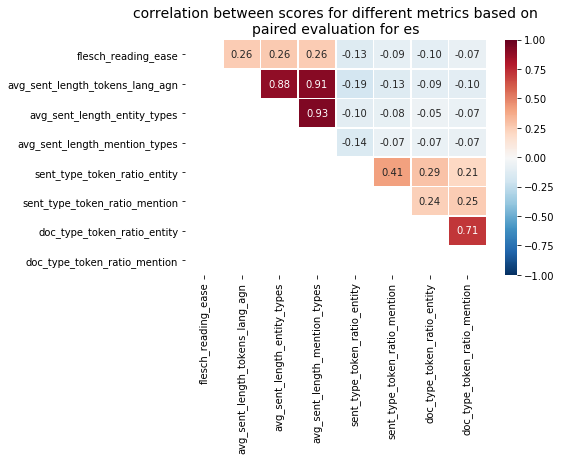

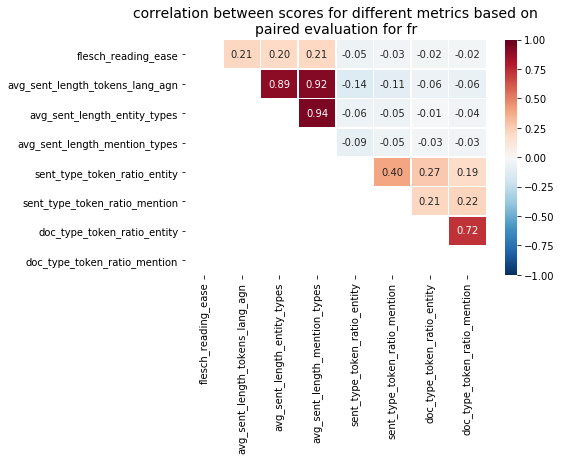

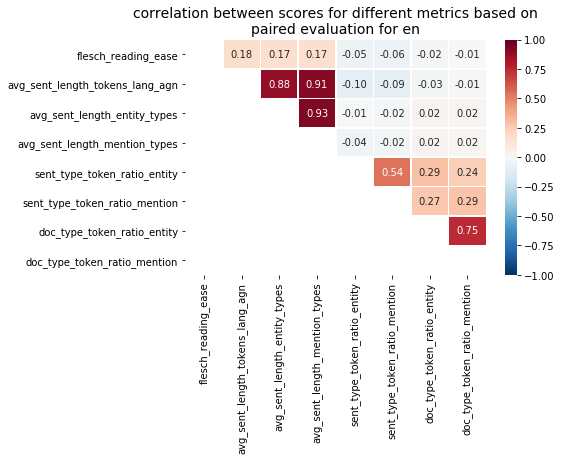

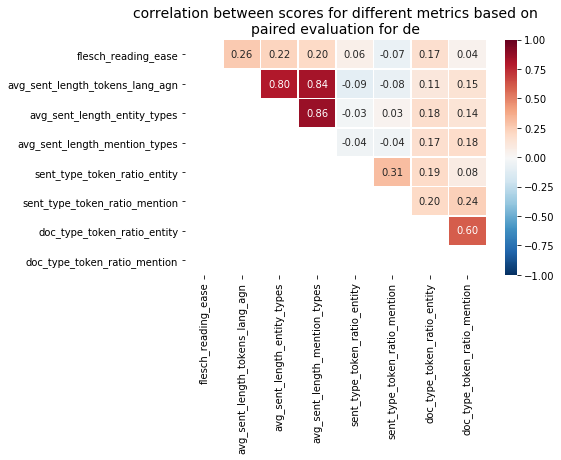

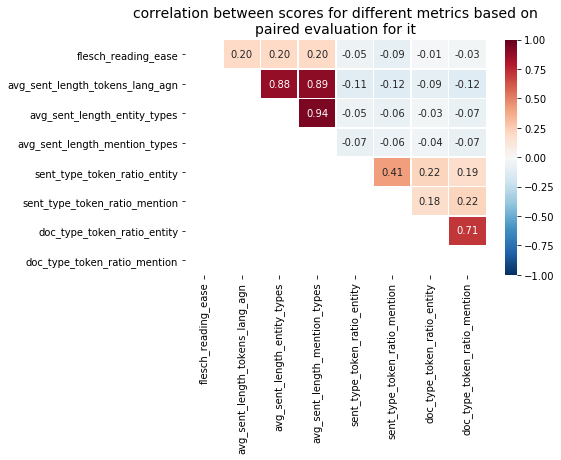

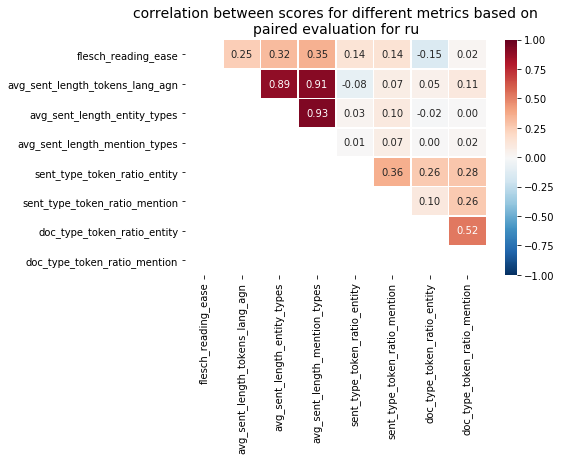

In [62]:
for lang in data_:
    lang_paired_heatmap(lang)

In [63]:
metric_results_df[lang].columns

Index(['flesch_reading_ease', 'avg_sent_length_tokens_lang_agn',
       'avg_sent_length_entity_types', 'avg_sent_length_mention_types',
       'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention',
       'doc_type_token_ratio_entity', 'doc_type_token_ratio_mention'],
      dtype='object')

In [64]:
# with open('intermediate/wiki_viki_entity_readability_features%s_lede%s.pickle' %(custom,bz_unzip), 'wb') as handle:
#     pickle.dump(data_, handle, protocol=pickle.HIGHEST_PROTOCOL)   

In [65]:
data_.keys()

dict_keys(['es', 'fr', 'en', 'de', 'it', 'ru'])

### plots for the report

In [73]:
datapoint

'es'

In [74]:
## ADD KLEXIKON
## TODO: integrate klexikon more smoothly and way before
with open('intermediate/wiki_viki_entity_readability_features%s_lede%s.pickle' %(custom,bz_unzip), 'rb') as handle:
    data_['de_klexikon'] = pickle.load(handle)['de_klexikon'] 
    
metrics = ['avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types', 'avg_sent_length_mention_types', 
           'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
           'doc_type_token_ratio_mention', 'flesch_reading_ease']

sums = {}
datas = {}

for lang in data_:
    sums[lang] = {}
    datas[lang] = {}
    for edition in editions:
        sums[lang][edition] = {}
        datas[lang][edition] = {}
    
    for wiki in editions:
        for metric in metrics:
            sums[lang][wiki][metric] = 0
            datas[lang][wiki][metric] = []
        

    for datapoint in data_[lang]:
        for wiki in editions:
            for metric in metrics:
                sums[lang][wiki][metric] += datapoint[wiki][metric]
                datas[lang][wiki][metric].append(datapoint[wiki][metric])

In [75]:
plot_metrics = ['avg_sent_length_tokens_lang_agn']

es
wiki: 2.640
0 0
viki: 1.938
0 0
fr
wiki: 2.473
0 1
viki: 1.887
0 1
en
wiki: 2.710
0 2
viki: 1.926
0 2
de
wiki: 2.988
1 0
viki: 2.391
1 0
it
wiki: 2.736
1 1
viki: 1.780
1 1
ru
wiki: 1.457
1 2
viki: 1.116
1 2
de_klexikon
wiki: 2.280
2 0
viki: 1.085
2 0


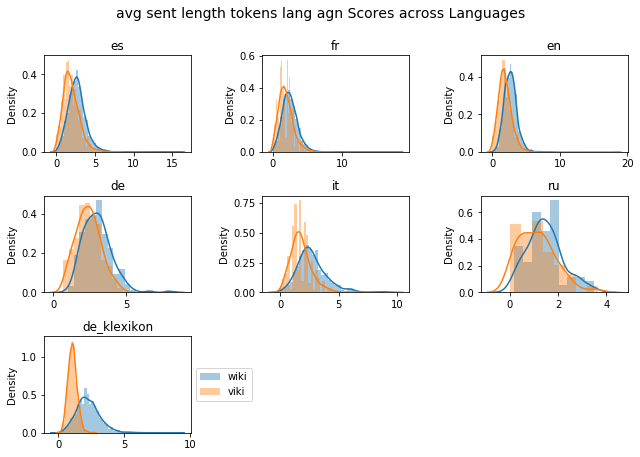

In [76]:
nrows = 3
ncols = 3
num = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize = (ncols*3, 6),
                        sharex = False, sharey = False)

for n, lang in enumerate(data_):
    print(lang)
    for metric in plot_metrics:
        for edition in editions:
            print('%s: %0.3f' %(edition, sums[lang][edition][metric]/len(datas[lang][edition][metric])))
            i = n//ncols
            j = n%ncols
            print(i, j)
            sns.distplot(datas[lang][edition][metric], label = edition, ax = axs[i][j])  
            axs[i][j].set_title(lang)

fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
            

axs[2,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
title = '%s Scores across Languages' %(' '.join(metric.split('_')))
plt.suptitle(title, fontsize = 14, y = 1.05)
plt.tight_layout()
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

es
wiki: 62.080
0 0
viki: 74.984
0 0
fr
wiki: 64.093
0 1
viki: 76.365
0 1
en
wiki: 57.393
0 2
viki: 75.527
0 2
de
wiki: 42.245
1 0
viki: 57.672
1 0
it
wiki: 57.037
1 1
viki: 72.274
1 1
ru
wiki: 38.168
1 2
viki: 56.360
1 2
de_klexikon
wiki: 39.808
2 0
viki: 66.965
2 0


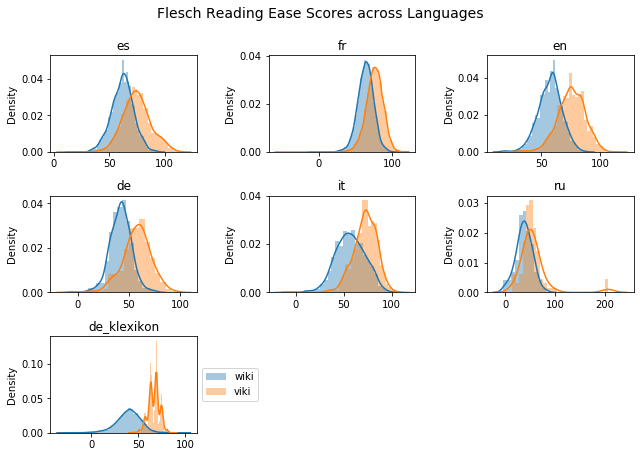

In [77]:
nrows = 3
ncols = 3
num = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize = (ncols*3, 6),
                        sharex = False, sharey = False)

for n, lang in enumerate(data_):
    print(lang)
    for metric in readability_metrics:
        for edition in editions:
            print('%s: %0.3f' %(edition, sums[lang][edition][metric]/len(datas[lang][edition][metric])))
            i = n//ncols
            j = n%ncols
            print(i, j)
            sns.distplot(datas[lang][edition][metric], label = edition, ax = axs[i][j])  
            axs[i][j].set_title(lang)
            
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
            

axs[2,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
title = 'Flesch Reading Ease Scores across Languages'
plt.suptitle(title, fontsize = 14, y = 1.05)
plt.tight_layout()
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')